<a href="https://colab.research.google.com/github/KomalSakhale/Unemployment-data-analysis/blob/main/UnemploymentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME : KOMAL ANNASAHEB SAKHALE

DATA SCIENCE INTERN [AICTE Oasis Infobyte] **bold text**






**Dataset Details:**

The dataset provides insights into the unemployment scenario across differnt indian states:



*   States: The states with India.
*   Date: The date when the unemployment rate was recorded.
*   Measuring Frequency: The frequency at which measrements were taken(Monthly).
*   Estimated Unemployment Rate(%): The percentage of indivisuals unemployed in each state of India.
*   Estimated Employed Indivisuals: The count of people currently employed.
*   Estimated Labour Participation Rate(%): The proportion of the working population(age group: 16-64 years) participating in the labour force, either employed or actively seeking employment.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# IMPORT REQUIRED LIBRARIES

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Load the Dataset into pandas dataframe

In [44]:
# Mount Drive and Read csv file
dfunemployment = pd.read_csv("/content/drive/MyDrive/Unemployment dataset/Unemployment_Rate_upto_11_2020.csv")

#show the datatype of dfunemployment
type(dfunemployment)

pandas.core.frame.DataFrame

In [45]:
# Display the first 5 records of the dataset
dfunemployment.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [46]:
# Display information about the datatype of each column and null values
dfunemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [47]:
# Display the shape of the Dataframe
dfunemployment.shape   # 267 columns, 9 columns

(267, 9)

In [48]:
#checking for null values
dfunemployment.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [49]:
# Display basic statistics about the data
dfunemployment.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


#2. Correlation Matrix



*   A correlation matrix is a table showing correlation coefficients between variables.
*   Each cell in the table shows the correlation between two variables.
*   The value is in the range -1 to 1.





In [50]:
# Compute the correlation matrix
# dfunemployment. corr()
dfunemployment.corr(numeric_only=True)

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
Estimated Unemployment Rate (%),1.000000,-0.245176,-0.073540,0.149976,-0.023976
Estimated Employed,-0.245176,1.000000,-0.047948,-0.113664,-0.119321
Estimated Labour Participation Rate (%),-0.073540,-0.047948,1.000000,0.080372,0.397836
longitude,0.149976,-0.113664,0.080372,1.000000,0.125895
latitude,-0.023976,-0.119321,0.397836,0.125895,1.000000


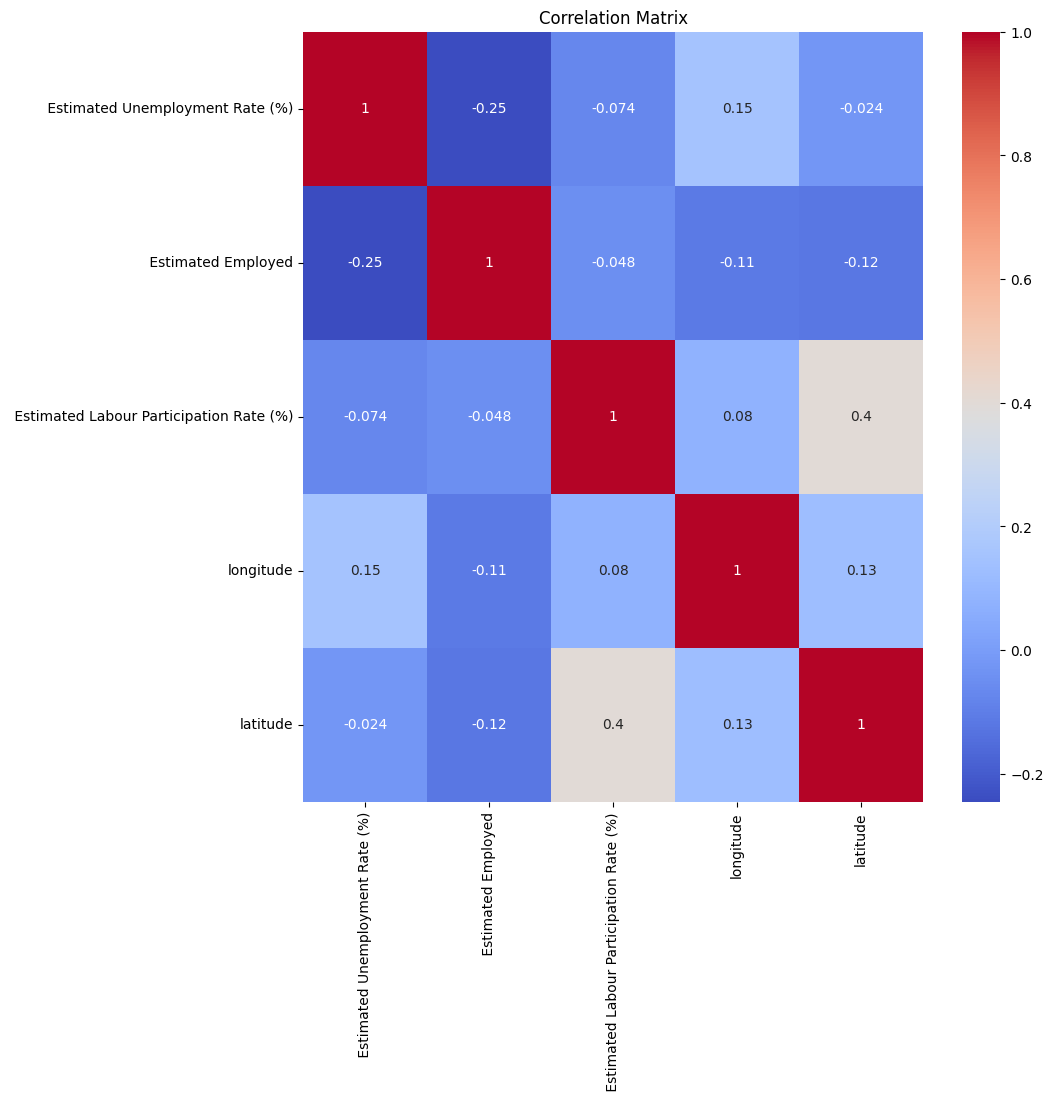

In [51]:
 # display the correlation matrix using a heatmap
 corr = dfunemployment.corr(numeric_only=True)
 fig, ax = plt.subplots(figsize=(10,10))
 sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')
 plt.title('Correlation Matrix')
 plt.show()

# Exploratory Data analysis(EDA)

In [52]:
# Renaming columns for better clarity of the data
dfunemployment.columns=["States","Date","Frequency","Estimated Unemployment Rate", "Estimated Employed", "Estimated Labour Participation Rate","Region","Longitude","Latitude"]

In [105]:
dfunemployment.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Longitude,Latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


* Plotting the estimated no. of employees according to different regions of india

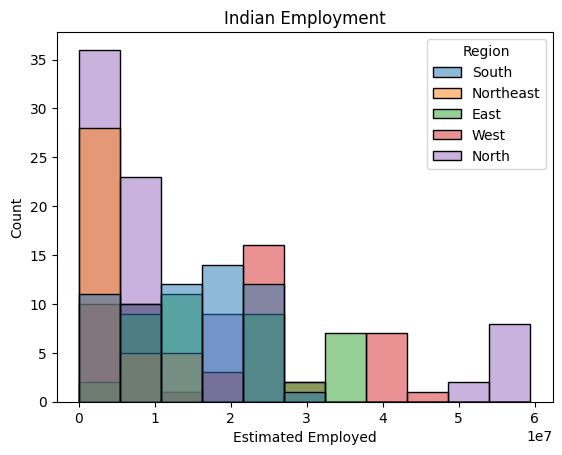

In [54]:
# Plotting a histplot

plt.title("Indian Employment")
sns.histplot(x="Estimated Employed",hue="Region", data=dfunemployment)
plt.show()


* Plotting the unemployment rate according to different regions of India

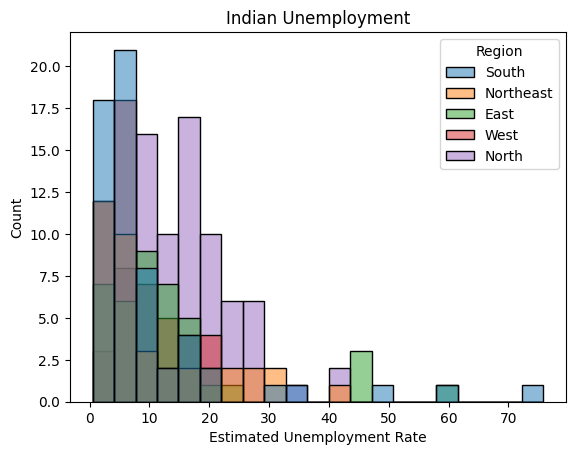

In [55]:
# Plotting a histplot
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate",hue="Region", data=dfunemployment)
plt.show()

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the labour force.

* Creating a dashboard to analyze the unemployment rate of each Indian state per region.

In [56]:
# Submit chart showing the unemployment rate in each Region and State

# Creating a Dataframe with relevant columns
unemployment = dfunemployment[["States", "Region", "Estimated Unemployment Rate"]]

# Creating sunburst chart
figure= px.sunburst(unemployment, path=["Region","States"],
                                 values="Estimated Unemployment Rate",
                                  width=700, height=700, color_continuous_scale="RdY1Gn",
                                 title="Unemployment Rate in India", template="presentation")
figure.show()

The northern regionns of india seems to have more unemployed people

4. Impact of Lockdown on States Estimated Employed

In [70]:
# Formatting the columns and their datatypes
import calendar

# Converting 'Data' column to datetime format
dfunemployment['Date']= pd.to_datetime(dfunemployment['Date'], dayfirst=True)

# Converting 'Frequency' and 'Region' columns to categorical data type
dfunemployment['Frequency']= dfunemployment['Frequency'].astype('category')
dfunemployment['Region']= dfunemployment['Region'].astype('category')

# Extracting month from 'Date' and creating a 'Month' column
dfunemployment['Month']= dfunemployment['Date'].dt.month

# Converting 'Month'to integer format
dfunemployment['Month_int']= dfunemployment['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
dfunemployment['Month_name']= dfunemployment['Month_int'].apply(lambda x: calendar.month_abbr[x])

# dropping the original 'Month' column
dfunemployment.drop(columns='Month',inplace=True)

In [71]:
dfunemployment.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Longitude,Latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [99]:
# Filtering data for the period before the lockdown (January to April)
bf_lockdown = dfunemployment[(dfunemployment['Month_int'] >= 1) & (dfunemployment['Month_int'] <= 4)]

# Filtering data for the lockdown period (April to July)
lockdown = dfunemployment[(dfunemployment['Month_int'] >= 4) & (dfunemployment['Month_int'] <= 7)]

# Calculating the mean unemployment rate before lockdown by state
m_bf_lock = bf_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

# Calculating the mean unemployment rate after lockdown by state
m_lock = lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

# Combining the mean unemployment rates before and after lockdown by state
m_lock['Unemployment Rate before lockdown'] = m_bf_lock['Estimated Unemployment Rate']

m_lock.columns = ['States', 'Unemployment Rate before lockdown', 'Unemployment Rate after lockdown']

m_lock.head()

,States,Unemployment Rate before lockdown,Unemployment Rate after lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250
2,Bihar,30.8025,20.7425
3,Chhattisgarh,9.6025,7.2450
4,Delhi,24.3600,17.6975


In [88]:
print(plot_per.columns)

Index(['States', 'Unemployment Rate after lockdown',
       'Unemployment Rate before lockdown',
       'Percentage Change in Unemplyment'],
      dtype='object')


In [104]:
# Step 1: Calculate percentage change (fixing case!)
m_lock['Percentage Change in Unemployment'] = round(
    (m_lock['Unemployment Rate after lockdown'] - m_lock['Unemployment Rate before lockdown']) /
    m_lock['Unemployment Rate before lockdown'] *100,2
)

# Step 2: Sort it correctly
plot_per = m_lock[['States', 'Percentage Change in Unemployment']].sort_values('Percentage Change in Unemployment')

# Step 3: Plot it
import plotly.express as px
fig = px.bar(
    plot_per,
    x='States',
    y='Percentage Change in Unemployment',
    color='Percentage Change in Unemployment',
    title='Percentage change in unemployment in each state after lockdown'
)
fig.show()